#제목:유튜브 카테고리 예측
###유튜브의 카테고리에 따른 좋아요 싫어요 수 비율을 에측한다

#역할
###정재현:종목 선정, 데이터에 like/all항목 추가,카테고리 네임 딕셔너리 추가, 카테고리에 따른 like/all값 그래프 생성, 데이터 가공, 좋아요와 싫어요 수 비율로 카테고리 예측
###심영수: 데이터 중복되는 값 정리, 조회수/좋아요/싫어요 순 데이터 정렬, 카테고리에 따른 like/all 값 데이터 정리 및 시각화 시도
###강경훈: 카테고리별 영상수 출력

#순서(목차)
###1.데이터 가져오기
###2. 필요한 데이터 추가하기
###3. 카테고리에 따른 조회수 그래프 생성
###4. 카테고리에 따른 좋아요,싫어요 수 합 계산하기
###5. 카테고리에 따른 좋아요와 싫어요 수 비율 그래프 생성
###6. 데이터 가공
###7. 좋아요와 싫어요 수 비율로 카테고리 예측하기
###8. 결론



## 분석할 데이터
https://www.kaggle.com/datasnaek/youtube-new
# WORK

## 주제
> 카테고리에 따른 좋아요 분류

### 수업시간에 한 파일들
> https://drive.google.com/file/d/1z_B41tNcIcOPpthq0Ry5wkYOGEWqDDCi/view?usp=sharing

### 유튭 데이터 파일
> https://drive.google.com/drive/folders/1Q6SWxrDgKP0ihgOLtX5lfmuyhCz-tZdM?usp=sharing

### json file
> https://drive.google.com/file/d/10kZ_DAXwSbJ86AcTM38THdOP60h2yad7/view?usp=sharing

### 수행공지 사항
> https://docs.google.com/document/d/18yDG98b2Ip2mnbTgaJ84GuNjxLt3IYBHsImDEN-4a40/edit?usp=sharing


In [ ]:
import sklearn
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
category_name={ '1' : 'Film , Animation' ,  '2' : 'Autos , Vehicles' ,  '10' : 'Music' ,  '15' : 'Pets , Animals' ,  '17' : 'Sports' ,  '18' : 'Short Movies' ,  '19' : 'Travel , Events' ,  '20' : 'Gaming' ,  '21' : 'Videoblogging' ,  '22' : 'People , Blogs' ,  '23' : 'Comedy' ,  '24' : 'Entertainment' ,  '25' : 'News , Politics' ,  '26' : 'Howto , Style' ,  '27' : 'Education' ,  '28' : 'Science , Technology' ,  '30' : 'Movies' ,  '31' : 'Anime/Animation' ,  '32' : 'Action/Adventure' ,  '33' : 'Classics' ,  '34' : 'Comedy' ,  '35' : 'Documentary' ,  '36' : 'Drama' ,  '37' : 'Family' ,  '38' : 'Foreign' ,  '39' : 'Horror' ,  '40' : 'Sci-Fi/Fantasy' ,  '41' : 'Thriller' ,  '42' : 'Shorts' ,  '43' : 'Shows' ,  '44' : 'Trailers' }
category_name['1']

'Film , Animation'

## 간추릴 데이터 
> category_id, views, likes, dislikes, comment_count	

In [ ]:
### 정재현
yt_df = pd.read_csv('/content/drive/My Drive/sunrin-bigdata-project/KRvideos.csv',encoding='utf-8').drop_duplicates(['video_id']) # yt means youtube
yt_df['like/all']=round(yt_df['likes']/(yt_df['dislikes']+yt_df['likes']),2)
yt_df['category_name']=yt_df['category_id'].map(lambda x: category_name[str(x)] if str(x) in category_name else "Unknown" )

yt_df
#type(yt_df['category_id'] )

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,like/all,category_name
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....,0.97,"People , Blogs"
1,hH7wVE8OlQ0,17.14.11,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...,0.88,"News , Politics"
2,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요,0.97,"People , Blogs"
3,0_8py-t5R80,17.14.11,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25,2017-11-12T11:19:52.000Z,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,다스는 누구겁니까 듣고 난 후 표정,0.92,"News , Politics"
4,bk55RbxiQdI,17.14.11,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...,0.91,"News , Politics"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34538,D5slHtZSvjY,18.14.06,귀염뽀짝 복숭아 🍑 투명액괴만들기 | 곤약젤리 액괴 | 말랑쫀득질긴 | 슬라임 | 뿌직,PPUJIG뿌직,22,2018-06-13T03:47:20.000Z,[none],224994,9898,330,8620,https://i.ytimg.com/vi/D5slHtZSvjY/default.jpg,False,False,False,영상 찍고나서 액괴가 더 좋아졌어요 😂항상 영상 찍고 편집하고나면 더 좋아지는 액괴...,0.97,"People , Blogs"
34540,C2Aw5HoDJX0,18.14.06,무서운이야기 24화 '미술실 자화상 귀신' 오싹튜브 학교괴담 뽀로로 장난감 애니메이...,오싹튜브,1,2018-06-13T00:00:01.000Z,"뽀로로|""무서운이이야기""|""장난감""|""뽀로로장난감애니메이션""|""애니메이션""|""만화""...",23404,190,29,111,https://i.ytimg.com/vi/C2Aw5HoDJX0/default.jpg,False,False,False,안녕하세요 ~ 오늘은 무서운 학교괴담입니다! 여러분들 학교에 어떤 괴담이 있는지 댓...,0.87,"Film , Animation"
34543,ckQpVlwY0Yk,18.14.06,취집이 꿈인 리얼 김치의 역대급 실수 실화냐ㅋㅋ,옴니버스,24,2018-06-12T06:00:01.000Z,[none],264256,1177,75,404,https://i.ytimg.com/vi/ckQpVlwY0Yk/default.jpg,False,False,False,📢 서울 제보로 만들어진것임을 알립니다📯 제보자의 원본카톡을 재편집한것임을 알립니다...,0.94,Entertainment
34556,B1Jm5lBHLLc,18.14.06,싱가포르 회담 김일성 왕조는 借刀殺人으로 끝장 난다. 문재인 정권은 덤으로...,pirater,22,2018-06-12T18:41:03.000Z,[none],26389,1989,42,233,https://i.ytimg.com/vi/B1Jm5lBHLLc/default.jpg,False,False,False,Alan Walker - Closer (New Song 2018)Download t...,0.98,"People , Blogs"


In [ ]:
###강경훈
## 영상별 카테고리, 조회수

yt_cate = yt_df.category_id
yt_view = yt_df.views
print(yt_cate)
print(yt_view)


0        22
1        25
2        22
3        25
4        25
         ..
34538    22
34540     1
34543    24
34556    22
34561    25
Name: category_id, Length: 15876, dtype: int64
0        156130
1         76533
2        421409
3        222850
4         84466
          ...  
34538    224994
34540     23404
34543    264256
34556     26389
34561     20923
Name: views, Length: 15876, dtype: int64


In [ ]:

###강경훈
## 전체 카테고리 출력

yt_catelen = list(yt_cate)
print(yt_catelen)

[22, 25, 22, 25, 25, 25, 22, 22, 22, 22, 22, 17, 19, 23, 10, 24, 24, 24, 24, 17, 23, 25, 24, 25, 15, 22, 22, 25, 24, 22, 22, 25, 1, 22, 25, 24, 1, 25, 25, 17, 10, 25, 24, 25, 22, 17, 1, 43, 25, 25, 22, 1, 10, 25, 1, 22, 25, 22, 10, 25, 25, 22, 24, 24, 10, 10, 22, 1, 22, 24, 25, 28, 22, 25, 10, 1, 24, 24, 22, 22, 22, 24, 25, 1, 22, 25, 23, 10, 24, 23, 24, 10, 25, 1, 22, 1, 10, 22, 22, 22, 23, 25, 22, 1, 1, 10, 20, 20, 22, 22, 22, 22, 25, 24, 25, 29, 24, 17, 29, 22, 20, 25, 24, 22, 20, 10, 25, 29, 1, 19, 1, 17, 1, 24, 22, 24, 22, 22, 24, 15, 1, 10, 20, 24, 10, 25, 22, 24, 10, 20, 22, 22, 24, 10, 20, 10, 25, 24, 24, 25, 24, 10, 24, 29, 25, 17, 24, 22, 24, 24, 28, 22, 24, 22, 25, 24, 25, 25, 25, 2, 24, 25, 27, 22, 17, 24, 25, 22, 25, 28, 17, 25, 24, 17, 23, 25, 25, 22, 10, 22, 25, 25, 1, 24, 24, 17, 24, 22, 25, 24, 25, 25, 10, 25, 25, 25, 25, 1, 24, 25, 22, 23, 24, 23, 25, 22, 23, 24, 22, 25, 25, 15, 26, 24, 24, 22, 24, 1, 24, 10, 1, 25, 29, 27, 24, 22, 25, 1, 22, 22, 23, 24, 25, 10, 24, 4

In [ ]:
###강경훈
## 카테고리별 영상수 출력

catecnt=dict()
for i in set(yt_catelen):
  catecnt[i]=0
for i in yt_catelen:
  catecnt[i]+=1

catecnt

{1: 870,
 2: 65,
 10: 797,
 15: 304,
 17: 470,
 19: 40,
 20: 598,
 22: 3379,
 23: 829,
 24: 4073,
 25: 3728,
 26: 251,
 27: 232,
 28: 47,
 29: 119,
 43: 73,
 44: 1}

In [ ]:
###강경훈
## 카테고리별 조회수 출력

views = []
viewcnt=[]
view = [0 for i in range(50)]
viewcnt = [0 for i in range(50)]

for i in range(0,len(yt_df)):
  try:
    view[yt_df.loc[i]['category_id']]+=yt_df.loc[i]['views']
  except:
    a=1
for j in range(0,50):
  if view[j]>0:
    print(view[j])

109417068
2869172
354042708
17985813
133427633
3909692
53971034
233796701
84726477
595929784
144614427
36595990
6346854
44378815
4262159
1999192


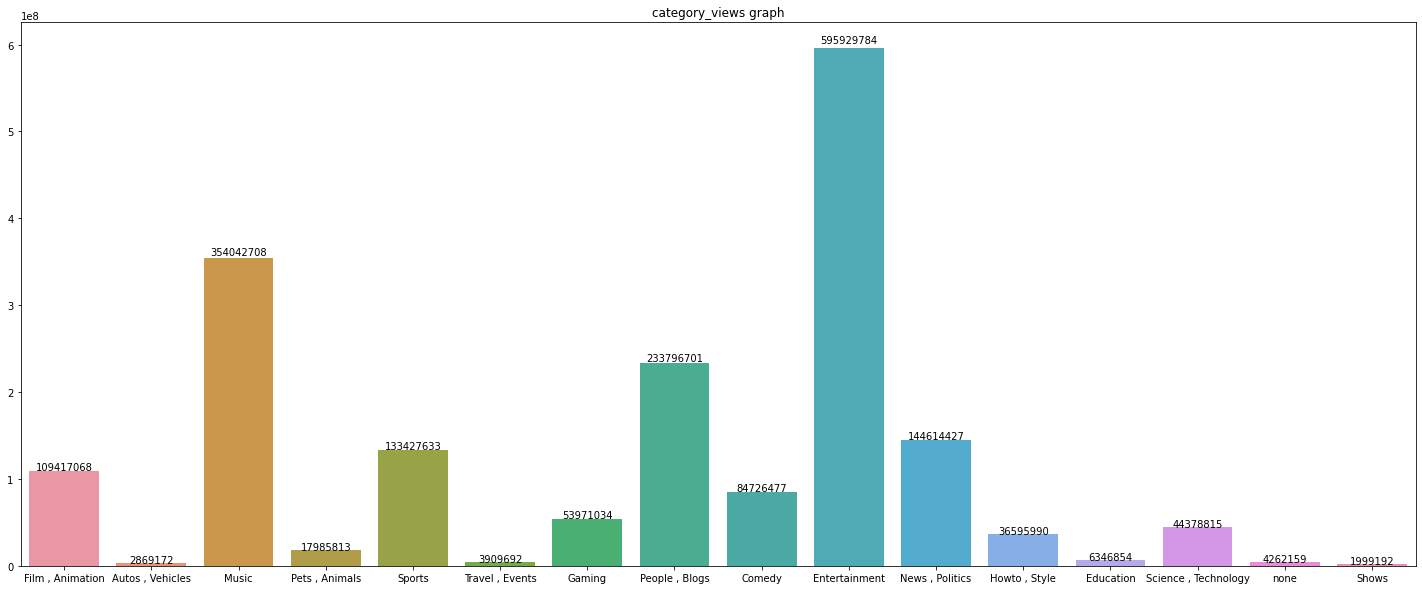

In [ ]:
###정재현
view_Stat = [[0]*16 for i in range(2)]
cnt=0
for j in range(0,50):
  if view[j]>0:
    view_Stat[0][cnt]=view[j]
    try:
      view_Stat[1][cnt]=category_name[str(j)]
    except:
      view_Stat[1][cnt]='none'
    
    
    cnt+=1
plt.figure(figsize=(25,10))
ax=sns.barplot(x=view_Stat[1], y=view_Stat[0])
plt.title("category_views graph")
for p in ax.patches:
   left, bottom, width, height = p.get_bbox().bounds 
   ax.annotate("%d"%(height), (left+width/2, height*1.01), ha='center')



In [ ]:
### SYS
## 	category_id	publish_time	tags	views	likes	dislikes	comment_count

# 조회수 기준 정렬
print("[조회수 기준]", yt_df.sort_values(by=['views'], axis=0).tail(20))

# 좋아요 기준  정렬
print("[좋아요 수 기준]",yt_df.sort_values(by=['likes'], axis=0,ascending=False).head(20))

# 싫어요 기준  정렬
print("[싫어요 수 기준]",yt_df.sort_values(by=['dislikes'], axis=0,ascending=False).head(20))


[조회수 기준]           video_id trending_date  ... like/all         category_name
1976   kTlv5_Bs8aw      17.25.11  ...     0.99                 Music
9936   dfnCAmr569k      18.13.01  ...     0.96                 Music
27758  VYOjWnS4cMY      18.07.05  ...     0.97                 Music
3532   817P8W8-mGE      17.03.12  ...     0.98                 Music
14238  wbSwFU6tY1c      18.08.02  ...     0.97  Science , Technology
19708  tCXGJQYZ9JA      18.13.03  ...     0.96                 Music
29713  yDiXQl7grPQ      18.18.05  ...     0.95  Science , Technology
25215  ffxKSjUwKdU      18.21.04  ...     0.97                 Music
158    n1WpP7iowLc      17.14.11  ...     0.95                 Music
12055  VRJmcxCrAOA      18.25.01  ...     0.99                Sports
4387   vn9mMeWcgoM      17.09.12  ...     0.96         Entertainment
25941  rRr1qiJRsXk      18.25.04  ...     0.97         Entertainment
20239  QwievZ1Tx-8      18.17.03  ...     0.99         Entertainment
24476  9TUBf6l7FBg      1

In [ ]:
### SYS / JJH
type(category_name)

dict

In [ ]:
yt_df.groupby(['like/all','category_id']).count()

video_id  trending_date  ...  description  category_name
like/all category_id                           ...                            
0.00     22                  1              1  ...            1              1
0.09     22                  1              1  ...            0              1
         24                  1              1  ...            1              1
0.10     22                  1              1  ...            1              1
0.11     22                  2              2  ...            1              2
...                        ...            ...  ...          ...            ...
1.00     27                  6              6  ...            6              6
         28                  2              2  ...            2              2
         29                  1              1  ...            1              1
         43                  3              3  ...            3              3
         44                  1              1  ...            1              1

[600 rows x 16 columns]

In [ ]:
##정재현
## 카테고리에서 좋아요 수 합/(좋아요수 합+싫어요수 합)
#like[카테고리 번호]=해당 카테고리 좋아요 합
like = []
like = [0 for i in range(50)]
dislike = []
dislike = [0 for i in range(50)]
#like[yt_df.loc[0]['category_id']]+=yt_df.loc[0]['likes']
#like[22]



#yt_df['like/all']=round(yt_df['likes']/(yt_df['dislikes']+yt_df['likes']),2)

for i in range(0,len(yt_df)):
  try:
    like[yt_df.loc[i]['category_id']]+=yt_df.loc[i]['likes']
    dislike[yt_df.loc[i]['category_id']]+=yt_df.loc[i]['dislikes']
  except:
    a=1
    

cnt=0
for j in range(0,50):
  if like[j]>0:
    print("cnt:{0}, j:{1}".format(cnt,j))
    print(like[j]/(like[j]+dislike[j]))
    cnt+=1
    




cnt:0, j:1
0.9658312318490937
cnt:1, j:2
0.9583638502341478
cnt:2, j:10
0.975632666136174
cnt:3, j:15
0.9897403522695503
cnt:4, j:17
0.9620644130895991
cnt:5, j:19
0.95679802115319
cnt:6, j:20
0.976590982007078
cnt:7, j:22
0.9731185342377506
cnt:8, j:23
0.9686602682774687
cnt:9, j:24
0.8962569457024803
cnt:10, j:25
0.935107619255256
cnt:11, j:26
0.9697918536554219
cnt:12, j:27
0.964937348045633
cnt:13, j:28
0.9721598240633731
cnt:14, j:29
0.938466159853964
cnt:15, j:43
0.8891116173120729


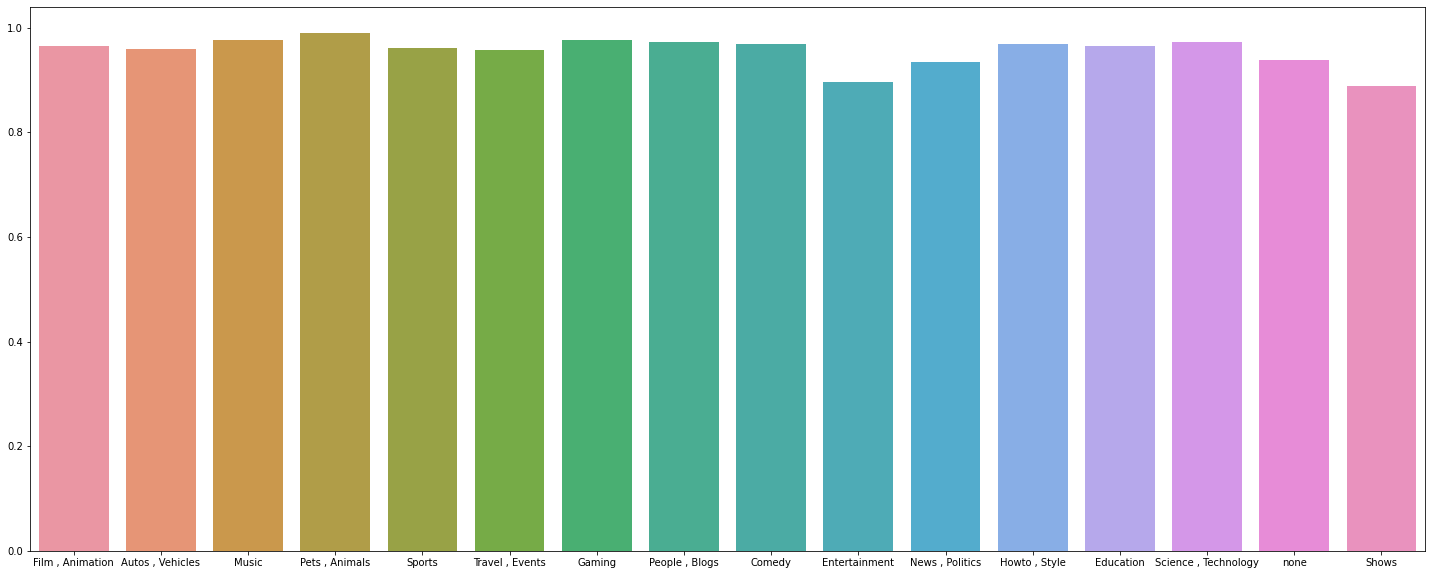

In [ ]:
##정재현 
l_dStat = [[0]*16 for i in range(2)]
cnt=0
for j in range(0,50):
  if like[j]>0:
    l_dStat[0][cnt]=like[j]/(like[j]+dislike[j])
    try:
      l_dStat[1][cnt]=category_name[str(j)]
    except:
      l_dStat[1][cnt]='none'
    
    
    cnt+=1
plt.figure(figsize=(25,10))
sns.barplot(x=l_dStat[1], y=l_dStat[0])

In [ ]:
##정재현
def get_ratio(l_a):#1ike/all
    cat = 8
    if l_a < 0: cat = 8
    elif l_a <= 0.8: cat = 7
    elif l_a <= 0.85: cat = 6
    elif l_a <= 0.9: cat = 5
    elif l_a <= 0.93: cat = 4
    elif l_a <= 0.96: cat = 3
    elif l_a < 1.0: cat = 2
    elif l_a == 1.0: cat = 1
    
    return cat
# 머신러닝 알고리즘에 불필요한 속성 제거
from sklearn.preprocessing import LabelEncoder
def fillna(df):
    df['views'].fillna(0,inplace=True)
    df['likes'].fillna(0,inplace=True)
    df['dislikes'].fillna(0,inplace=True)
    df['category_id'].fillna(0,inplace=True)
    
    return df
# views   like/all category_name  생존
def drop_features(df):
  df.drop(['category_id','likes','dislikes','title','video_id','trending_date','channel_title','publish_time','tags','comment_count','thumbnail_link','comments_disabled','comments_disabled','video_error_or_removed','description'],axis=1,inplace=True)
  return df



def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    return df
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
yt_df = pd.read_csv('/content/drive/My Drive/sunrin-bigdata-project/KRvideos.csv',encoding='utf-8').drop_duplicates(['video_id']) # yt means youtube
yt_df['like/all']=round(yt_df['likes']/(yt_df['dislikes']+yt_df['likes']),2)
yt_df['category_name']=yt_df['category_id'].map(lambda x: category_name[str(x)] if str(x) in category_name else "Unknown" )
yt_df['like/all_Cat'] = yt_df['like/all'].apply(lambda x : get_ratio(x))
yt_df.drop('like/all', axis=1, inplace=True)
y_yt_df = yt_df['category_name']
X_yt_df=yt_df.drop('category_name',axis=1)
# 피처 데이터 세트 가공
X_yt_df = transform_features(X_yt_df)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_yt_df, y_yt_df, test_size=0.4, random_state=12)


In [ ]:

##정재현

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=13)
rf_clf = RandomForestClassifier(random_state=13)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))


DecisionTreeClassifier 정확도: 0.2363
RandomForestClassifier 정확도:0.2376
LogisticRegression 정확도: 0.2579


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
##정재현
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_yt_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_yt_df.values[train_index], X_yt_df.values[test_index]
        y_train, y_test = y_yt_df.values[train_index], y_yt_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 

# exec_kfold 호출
exec_kfold(dt_clf , folds=5)
from sklearn.model_selection import cross_val_score

scores = cross_val_score( dt_clf, X_yt_df,y_yt_df ,cv=5 )
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.2443
교차 검증 1 정확도: 0.2463
교차 검증 2 정확도: 0.2520
교차 검증 3 정확도: 0.2425
교차 검증 4 정확도: 0.2302
평균 정확도: 0.2431


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


교차 검증 0 정확도: 0.2409
교차 검증 1 정확도: 0.2529
교차 검증 2 정확도: 0.2469
교차 검증 3 정확도: 0.2413
교차 검증 4 정확도: 0.2265
평균 정확도: 0.2417


#결론
###유튜브의 좋아요와 싫어요 수의 비율과 카테고리 간의 상관관계는 없다고 볼 수 있으나, 내 실력이 부족하여 학습을 잘못했을 가능성도 있다고 생각한다.